## Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
# bokeh
from bokeh.resources import INLINE
from bokeh.palettes import brewer, Plasma, Category20, Colorblind, Set3, PiYG
from bokeh.models.mappers import LinearColorMapper
from bokeh.io import output_file, save
from bokeh.plotting import figure
# scikit and scipy
import scikits.bootstrap as bootstrap 
import scipy
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

## Import data files

In [4]:
marine = pd.read_csv("marinewithcolorsforplotting.csv")
ref = pd.read_csv("supptable2final.csv")

## Figure 2. Bar chart of histidine kinases, organized phylogenetically
Note the plot will appear in a new html window

In [5]:
df = marine

n=0
classDict = {}
classList = []
colors = Category20[19]
colors.append('#4ca6a6')
colors.append('#99cccc')
colors.append('#551A8B')
colors.append('#4ca6a6')

for group in df.groupby('ForColors').groups.keys():
    classDict[group] = n
    n += 1
    classList.append(group)
    print(group)
print(classList)

#sort df by class
newdf = df.sort_values(by=['ForColors'])
print(newdf.head())

for index, row in df.iterrows():
    newdf.loc[index,'Class Number'] = classDict[row['ForColors']]
    newdf.loc[index,'Class Color']= colors[classDict[row['ForColors']]]

output_file('outputClass.html', mode='inline')
width = 1000
height = 1000
inner_radius = 25

minr = 0
maxr = 150+25

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle

def rad(mic):
    return mic+25
    
p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-150, 150), y_range=(-150, 150),
    min_border=0, outline_line_color="#A9A9A9",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.annular_wedge(0, 0, inner_radius, rad(newdf['HPK']),
        -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
        color=newdf['Class Color'])

p.rect([-135,-135,-135,-135,-25,-25,-25,-25,65,65,65,65],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143],width=7,height=5, color=colors)
p.text([-130,-130,-130,-130,-20,-20,-20,-20,70,70,70,70],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-14], text=classList,text_font_size='19pt', text_align='left',text_baseline='middle')

# circular axes and labels
labels = np.array([5,25,50,100])
radii = rad(labels)
p.circle(0, 0, radius=radii, fill_color=None, line_color="gray")
p.text(0, radii, [str(r) for r in labels],
       text_font_size="20pt", text_align="center", text_baseline="middle")
save(p)

Alphaproteobacteria
Bacteroidetes
Betaproteobacteria
Cyanobacteria
Deltaproteobacteria
Epsilonproteobacteria
Firmicutes
Gammaproteobacteria
Other
Pelagibacter
Prochlorococcus
Synechococcus
['Alphaproteobacteria', 'Bacteroidetes', 'Betaproteobacteria', 'Cyanobacteria', 'Deltaproteobacteria', 'Epsilonproteobacteria', 'Firmicutes', 'Gammaproteobacteria', 'Other', 'Pelagibacter', 'Prochlorococcus', 'Synechococcus']
     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1              Genome Name  HPK  \
163          63           170             180  Nitrobacter sp. Nb-311A   36   
69          158           310             337  Roseobacter sp. AzwK-3b   33   
68          174           311             338     Roseobacter sp. CCS2   20   
67          109           312             339   Roseobacter sp. GAI101   45   
66           47           313             340   Roseobacter sp. MED193   38   

       RR  Hybrid  hpkper100   % Hybrid  RR:HPK Ratio   ...     Habitat  \
163  30.0    10.0   0.834879  27.77

/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 23), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 23), ('line_color', 23), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/s

'/Users/noelle/Documents/science_projects/2017_histidinekinasepaper/Submit2/patterns_TCS_sensing_marine_bacteria/outputClass.html'

## Figure 3a. K means clustering

[2 1 0 0 2 2 0 0 0 0 2 2 2 0 1 0 0 1 0 2 3 0 2 2 2 2 2 2 3 1 1 1 3 3 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 1 2 0 0 2 3 1 1 0 2 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 2 0 2 0 0 0 0 3 3 0 0 0 0 3 0 3 3 3 0 3 0 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 2 2 2 2 0 0 3
 0 1 0 3 0 0 3 0 1 0 0 0 1 0 0 0 1 1 0 0 0 2 0 0 1 0 0 3 0 0 2 0 3 0 1 1 1
 2 0 2 0 1 0 3 0 2 2 2 1 1 0 0 3 1 1 0 1 0 1 0 0 0 0 1 0 0 1 3 1 0 0 2 0 0
 0 0 0 3 0 1 0 3 0 0 0 0 0 0 0 1 0 0 0 0 2 2 2 2 0 1 3 3 3 3 3 3 3 3 0 2 0
 3 1 0 1 1 1 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 0 0 3 0 2 2
 0 0 0 2 2 0 0 3 3 0 3 0 3 3 3 3 1 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0]
0
1
2
3


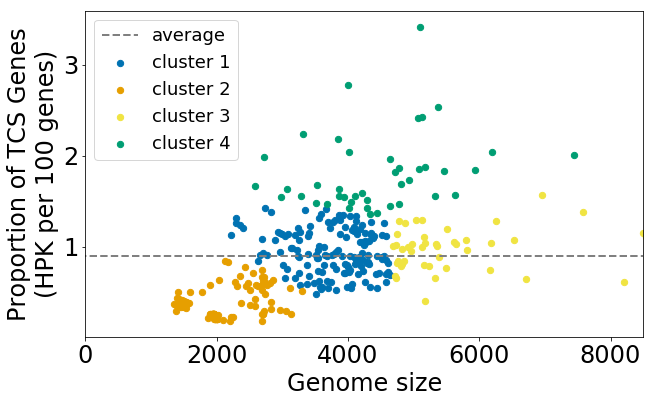

In [6]:
from sklearn import preprocessing
fig3, ax3 = plt.subplots(figsize=(10,6))
plt.plot([-100,9000], [0.902, 0.902], color='grey', linestyle='--', linewidth=2)
plt.xlim(0,8500)
colors = Colorblind[6]
n=0
X = df.loc[:,['Gene Count', 'hpkper100']]
data = preprocessing.scale(X)

kmeans = cluster.KMeans(n_clusters=4, random_state=40)
#data2 = preprocessing.scale(data)        
kmeans.fit(data)
labels = kmeans.labels_
print(labels)
        
X['label'] = labels
# sort based on label
X = X.sort_values('label')

for name, group in X.groupby('label'):
    print(name)
    plt.scatter(group['Gene Count'], group['hpkper100'], color=colors[name], s=40)
plt.xlabel('Genome size', fontsize=24)
plt.ylabel('Proportion of TCS Genes\n(HPK per 100 genes)', fontsize=24)

#plt.xlim([0,3])
#plt.ylim([0,5])
plt.legend(loc='upper left', labels=['average', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6'], fontsize=18)
plt.tick_params(labelsize=24)
# write the clusters to file

df['clusters'] = labels

df.to_csv('marinedatawithclusters.csv')

## Figure 3b. Copiotrophs vs. oligotrophs

Bootstrapped 95% confidence intervals: Copiotrophs 
Low: 1.3678753585217391 
High: 1.5564038889130434
Bootstrapped 95% confidence intervals: Oligotrophs 
Low: 0.2738726135789473 
High: 0.33124752340350877
1.4597397518695652
0.2976010630701754


Text(0,0.5,'HPK per 100 Genes (Average)')

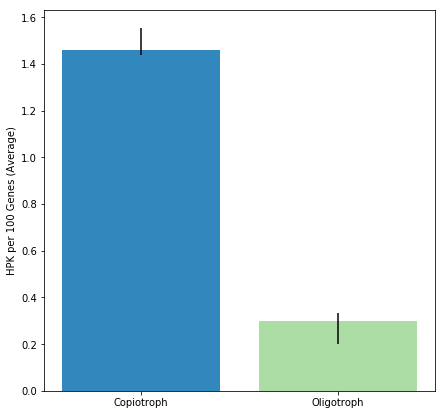

In [7]:
# copiotrophs vs oligotrophs
df = marine

copiotroph = df.loc[df['org_type_y'].isin(['c'])]
oligotroph = df.loc[df['org_type_y'].isin(['o'])]

copiotrophCIs = bootstrap.ci(data=copiotroph['hpkper100'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Copiotrophs \nLow:", copiotrophCIs[0], "\nHigh:", copiotrophCIs[1]) 

oligotrophCIs = bootstrap.ci(data=oligotroph['hpkper100'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Oligotrophs \nLow:", oligotrophCIs[0], "\nHigh:", oligotrophCIs[1]) 
print(np.mean(copiotroph['hpkper100']))
print(np.mean(oligotroph['hpkper100']))
error = [copiotrophCIs-np.mean(copiotroph['hpkper100']), oligotrophCIs-np.mean(oligotroph['hpkper100'])]
fig = plt.figure(figsize=(7,7))
plt.bar(x=['Copiotroph', 'Oligotroph'], height=[1.46, 0.298],yerr=error, color=['#3288bdff','#abdda4ff'])
plt.ylabel('HPK per 100 Genes (Average)')
#hpkper100

## Figure 4a. RR vs HPK scatter plot

## Figure 4b. RR:HPK Ratio violin plot

/Users/noelle/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Text(0.5,0,'')

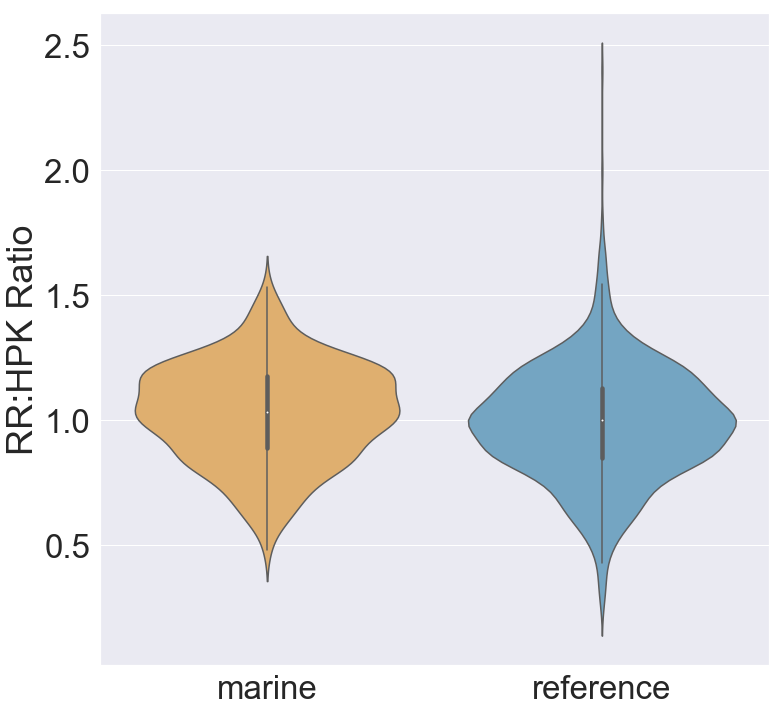

In [8]:
alldata = pd.concat([marine, ref], keys =['marine', 'reference']).reset_index()
import seaborn as sns
sns.set(font_scale=3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.violinplot(y=alldata["RR:HPK Ratio"], x = alldata["level_0"], fig_size=[4,4], palette=['#f2b15c','#67a9cf'])
ax.set_xlabel("")

## Figure 5. Location of TCS genes (an example)

2781240
2263440
4506695
3197797
4134251
2006327
4605420
944030
562235
4213613
247030
4531148
2707512
2300517
3226312
2897774
2951266
4311099
3338870
3548300
3311264
4429259
1130309
3963949
979986
3152179
227675
2162134
2112874
4294358
4626127
2055555
3662378
538810
1239441
2074187
2675286
2963811
3098258
3648304
195803
4489556
3623522
1662820
1349507
2004358
4300540
3207966
3228669
823837
2612775
2849601
3490412
3638395
2671457
3452441
253907
4431489
4506695
3197797
2006327
4213613
978991
1639983
660460
4531148
2707512
2002782
2952341
1645406
564489
3640418
539969
2846340
1053642
3548300
4621038
1130309
3642350
2884682
979986
4626127
2264918
2055555
1239441
3098258
2963811
3491770
229246
2839576
3623522
1829554
1349507
3650499
3227715
1129220
3207966
3210838
816970
945358
2945909
2612049
3452441
3754442
818659
4135721
3354243
2005862
561061
248286
1352856
1756102
1126913
2779798
3151512
4492095
2897774
1366987
673773
4488185
3338870
4634452
2501898
3664179
825823
926655
2162134
4604794

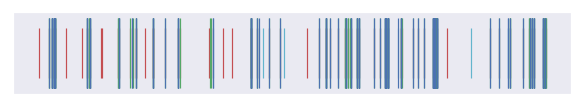

In [9]:
# one example - ingest is a list of all proteins in the genome with their start coordinate 
rrFile = pd.read_csv("199_rr.csv")
hkFile = pd.read_csv("199hk.csv") 

fig = plt.figure(figsize = (10,1.5))
ax = fig.add_subplot(111)
y = 1.5
hkList = []
rrList = []

for i, row in hkFile.iterrows():
    xValue = row['Start Coord']
    print(xValue)
    plt.plot(xValue,y, 'c|', ms = 50, mew = 1.2, mfc = 'c')
    hkList.append(xValue)

for i, row in rrFile.iterrows():
    xValue = row['Start Coord']
    print(xValue)
    plt.plot(xValue,y, 'r|', ms = 50, mew = 1.2, mfc = 'r')
    rrList.append(xValue)

matchList = []
for item in hkList:
    print(item)
    #15000 should be something like 3 genes 3675
    lowerRange = item - 30000
    upperRange = item + 30000
    for item2 in rrList:
        item2 = int(item2)
        #find all rrs that are not near an HPK
        if item2 in range(lowerRange, upperRange):
            print("in operon")
            matchList.append(item2)
matchList2 = []
for item in rrList:
    lowerRange = item - 30000
    upperRange = item + 30000
    for item2 in hkList:
        item2 = int(item2)
        if item2 in range (lowerRange, upperRange):
            print("in operon")
            matchList2.append(item2)
for item in matchList:
    plt.plot(item, y, 'g|', ms = 70, mew = 1.2, mfc = 'g')
for item in matchList2:
    plt.plot(item, y, 'b|', ms=70, mew=1.2, mfc='b')

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

myset = set(matchList)
print(len(myset))
print(len(set(matchList2)))
print(len(hkFile))
print(len(rrFile))


plt.show()

## Figure 6. Hybrid histidine kinases 

Bootstrapped 95% confidence intervals: Marine 
Low: 18.44002019080183 
High: 21.84417623642683
Bootstrapped 95% confidence intervals: Reference 
Low: 16.369644186084923 
High: 18.212345581654247
20.144313045185974
17.278550906751313


Text(0,0.5,'% Hybrid HPK (Average)')

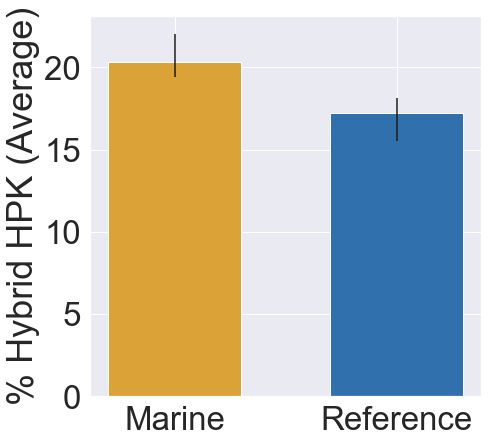

In [10]:
# marine vs reference hybrids
font = {
        'size'   : 16}

plt.rc('font', **font)
marineCIs = bootstrap.ci(data=marine['% Hybrid'].fillna(0), statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Marine \nLow:", marineCIs[0], "\nHigh:", marineCIs[1]) 

referenceCIs = bootstrap.ci(data=ref['% Hybrid'].fillna(0), statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Reference \nLow:", referenceCIs[0], "\nHigh:", referenceCIs[1]) 
print(np.mean(marine['% Hybrid'].fillna(0)))
print(np.mean(ref['% Hybrid'].fillna(0)))

error = [marineCIs-np.mean(marine['% Hybrid'].fillna(0)), referenceCIs-np.mean(ref['% Hybrid'].fillna(0))]
fig = plt.figure(figsize=(7,7))
plt.bar(x=['Marine', 'Reference'], height=[20.33, 17.2],yerr=error, color=['#dba237ff','#3070adff'], width=0.6)
plt.ylabel('% Hybrid HPK (Average)')

## Figure 7. Violin plots
An example - RR:HPK ratio of Cyanobacteria

     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
11          151             0               0   
12          100             1               1   
22           87            71              77   
23          172            70              74   
24          152            69              71   
25          166            74              84   
26          165            73              83   
27           91            75              85   
28           12           144             154   
29          296           277             304   
30          262           268             295   
31          261           267             294   
61          260           266             293   
73          259           265             292   
101         294           264             289   
102         258           263             286   
103         140           262             283   
104         139           261             282   
105         138           260             281   
106         257     

/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont:

/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont:

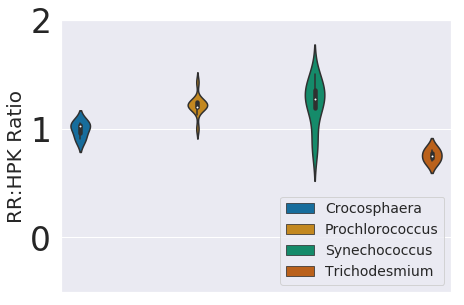

In [11]:
df = marine

font = {'family' : 'normal',
        'size'   : 13}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=[7,5])
grouped = df.groupby('Phylum')
for name, group in grouped:
    if name == "Cyanobacteria":
        k = group
print(k)
sns.violinplot(x="CyanoClass", y="RR:HPK Ratio", hue="CyanoClass", data=k, palette="colorblind", width=0.8)
plt.xticks(rotation=45)
plt.ylabel(s=14)
plt.ylabel('RR:HPK Ratio', fontsize=20) 
ax.get_xaxis().set_visible(False)
ax.set_ylim([-0.5,2])
plt.subplots_adjust(hspace = 0.01)
#plt.legend(bbox_to_anchor=(0.51,0.45),
#           bbox_transform=plt.gcf().transFigure)
#plt.tight_layout()
l = ax.legend(loc=4, fontsize=14)
l.set_title('')
plt.show()